In this notebook we will evaluate different combinations of features.

- Dataset = GTZAN
- Model = SVM


In [1]:
import numpy as np
# import matplotlib.pyplot as plt
# import IPython
# from scipy import signal
# import librosa.display
# import librosa
# import sklearn
from sklearn import ensemble, model_selection, svm, pipeline, preprocessing, metrics
from pathlib import Path
from sklearn.decomposition import PCA


In [2]:
def report(y_true, y_pred):
    r = metrics.classification_report(y_true=y_true, y_pred=y_pred)
    print(r)

    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)

    f1 = metrics.f1_score(y_true=labels, y_pred=y_pred, average='weighted')
    print(f'F1: {f1}')

    

## Load labels

In [3]:
datapath = Path('data_npy/gtzan')

labels = np.load(datapath / 'labels_train.npy')
np.unique(labels)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

## Model

In [4]:
clf = svm.SVC()

pipe = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('dim_reduction', PCA(n_components=100)),
        ('clf', clf),
    ]
)

pipe_nopca = pipeline.Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('clf', clf),
    ]
)

cv = model_selection.StratifiedKFold(n_splits=10)

## Feature: Tempo

Features: (799, 1)


/Users/sean.fitzgibbon/dev/Research-Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sean.fitzgibbon/dev/Research-Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sean.fitzgibbon/dev/Research-Project/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        80
   classical       0.15      0.11      0.13        80
     country       0.21      0.04      0.06        80
       disco       0.17      0.57      0.26        80
      hiphop       0.20      0.61      0.30        80
        jazz       0.00      0.00      0.00        79
       metal       0.00      0.00      0.00        80
         pop       0.12      0.07      0.09        80
      reggae       0.24      0.41      0.30        80
        rock       0.00      0.00      0.00        80

    accuracy                           0.18       799
   macro avg       0.11      0.18      0.12       799
weighted avg       0.11      0.18      0.12       799

F1: 0.11527863277797501


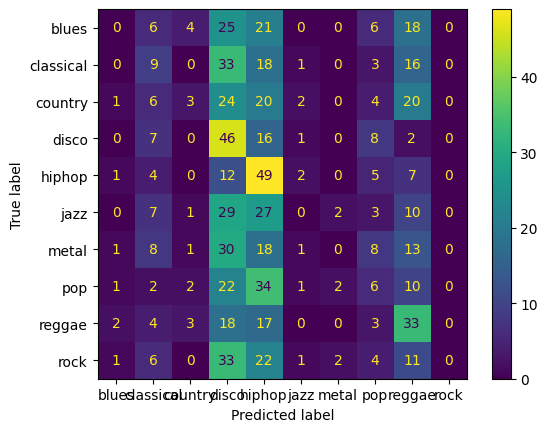

In [5]:
features = np.load(datapath / 'tempo.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe_nopca, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: SC

Spectral Contrast

Features: (799, 9030)
              precision    recall  f1-score   support

       blues       0.46      0.65      0.54        80
   classical       0.73      0.85      0.79        80
     country       0.44      0.60      0.51        80
       disco       0.32      0.30      0.31        80
      hiphop       0.50      0.36      0.42        80
        jazz       0.89      0.32      0.47        79
       metal       0.61      0.89      0.72        80
         pop       0.39      0.65      0.49        80
      reggae       0.50      0.12      0.20        80
        rock       0.38      0.26      0.31        80

    accuracy                           0.50       799
   macro avg       0.52      0.50      0.48       799
weighted avg       0.52      0.50      0.48       799

F1: 0.4756585541441735


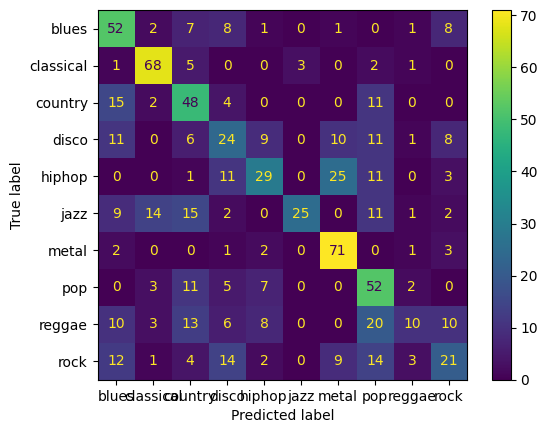

In [6]:
features = np.load(datapath / 'sc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

report(labels, y_pred)

## Feature: MFCC

In [7]:
features = np.load(datapath / 'mfcc.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=-1
)

Features: (799, 25800)


              precision    recall  f1-score   support

       blues       0.74      0.35      0.47        80
   classical       0.85      0.89      0.87        80
     country       0.46      0.53      0.49        80
       disco       0.37      0.46      0.41        80
      hiphop       0.52      0.57      0.54        80
        jazz       0.63      0.52      0.57        79
       metal       0.69      0.81      0.75        80
         pop       0.74      0.74      0.74        80
      reggae       0.55      0.38      0.44        80
        rock       0.35      0.45      0.40        80

    accuracy                           0.57       799
   macro avg       0.59      0.57      0.57       799
weighted avg       0.59      0.57      0.57       799

F1: 0.5678976863928089


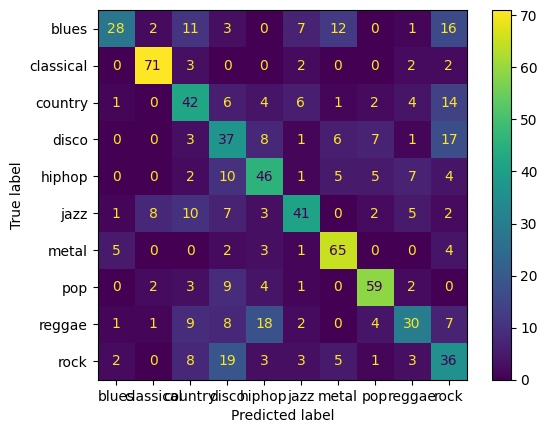

In [8]:
report(labels, y_pred)

## Feature: STFT

In [9]:
features = np.load(datapath / 'stft.npy')
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=4
)

Features: (799, 661125)


              precision    recall  f1-score   support

       blues       0.40      0.21      0.28        80
   classical       0.88      0.81      0.84        80
     country       0.46      0.33      0.38        80
       disco       0.40      0.30      0.34        80
      hiphop       0.41      0.39      0.40        80
        jazz       0.42      0.59      0.49        79
       metal       0.60      0.88      0.71        80
         pop       0.61      0.75      0.67        80
      reggae       0.37      0.34      0.35        80
        rock       0.26      0.29      0.27        80

    accuracy                           0.49       799
   macro avg       0.48      0.49      0.47       799
weighted avg       0.48      0.49      0.47       799

F1: 0.47428289409116486


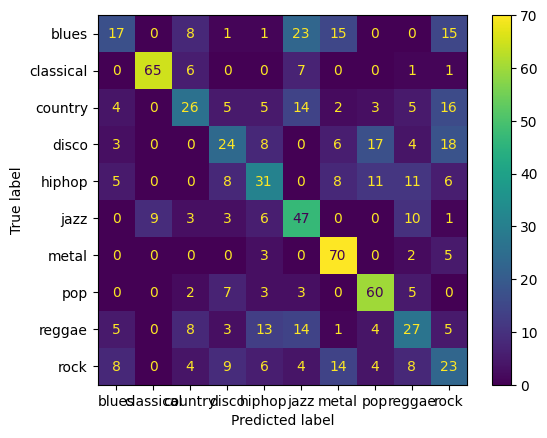

In [10]:
report(labels, y_pred)

## Feature: MFCC + STFT

Features: (799, 686925)
              precision    recall  f1-score   support

       blues       0.38      0.17      0.24        80
   classical       0.88      0.81      0.84        80
     country       0.43      0.33      0.37        80
       disco       0.37      0.31      0.34        80
      hiphop       0.45      0.45      0.45        80
        jazz       0.42      0.58      0.49        79
       metal       0.62      0.88      0.73        80
         pop       0.61      0.72      0.66        80
      reggae       0.40      0.39      0.39        80
        rock       0.29      0.31      0.30        80

    accuracy                           0.50       799
   macro avg       0.49      0.50      0.48       799
weighted avg       0.49      0.50      0.48       799

F1: 0.48179991096003766


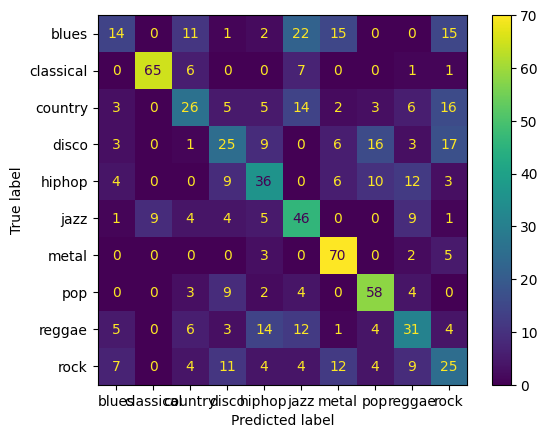

In [11]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'stft.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)

## Feature: MFCC + SC

Features: (799, 34830)


/Users/sean.fitzgibbon/dev/Research-Project/.venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


              precision    recall  f1-score   support

       blues       0.84      0.59      0.69        80
   classical       0.85      0.90      0.87        80
     country       0.54      0.71      0.61        80
       disco       0.46      0.68      0.55        80
      hiphop       0.67      0.64      0.65        80
        jazz       0.68      0.54      0.61        79
       metal       0.80      0.86      0.83        80
         pop       0.82      0.75      0.78        80
      reggae       0.63      0.45      0.53        80
        rock       0.40      0.40      0.40        80

    accuracy                           0.65       799
   macro avg       0.67      0.65      0.65       799
weighted avg       0.67      0.65      0.65       799

F1: 0.6526284180679951


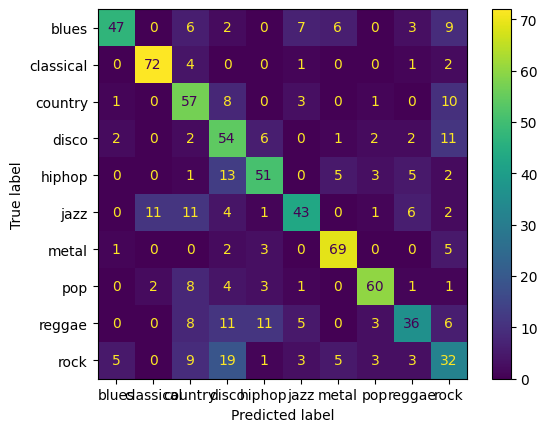

In [12]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)

## Feature: MFCC + SC + Tempo

Features: (799, 34831)


/Users/sean.fitzgibbon/dev/Research-Project/.venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


              precision    recall  f1-score   support

       blues       0.81      0.60      0.69        80
   classical       0.85      0.91      0.88        80
     country       0.55      0.71      0.62        80
       disco       0.47      0.71      0.57        80
      hiphop       0.68      0.64      0.66        80
        jazz       0.66      0.52      0.58        79
       metal       0.80      0.86      0.83        80
         pop       0.82      0.75      0.78        80
      reggae       0.65      0.46      0.54        80
        rock       0.40      0.39      0.39        80

    accuracy                           0.66       799
   macro avg       0.67      0.66      0.66       799
weighted avg       0.67      0.66      0.66       799

F1: 0.6550964243965883


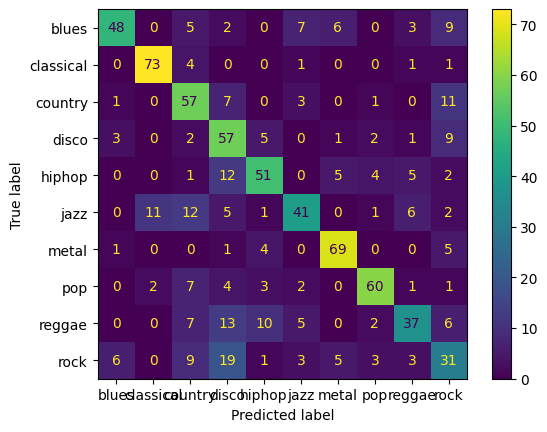

In [13]:
features = [
    np.load(datapath / 'mfcc.npy'),
    np.load(datapath / 'sc.npy'),
    np.load(datapath / 'tempo.npy'),
]
features = np.concatenate(features, axis=1)
print(f'Features: {features.shape}')

y_pred = model_selection.cross_val_predict(
    estimator=pipe, 
    X=features, 
    y=labels, 
    cv=cv, 
    n_jobs=2
)

report(labels, y_pred)